# Variables Aleatorias


- Variables aleatorias
- Probabilidades puntuales, funciones de densidad y funciones de distribución acumuladas. 


Una variable aleatoria es una función que asigna un número a cada elemento en el espacio muestral de un experimento aleatorio. 
Se denomina Variable Aleatoria Discreta si los valores son enteros:

$\begin{array}{cc} X:& \Omega \to \mathbb{N}\\
&\omega \to X(\omega)
\end{array}$

y Variable Aleatoria Continua si los valores son reales:

$\begin{array}{cc} X:& \Omega \to \mathbb{R}\\
&\omega \to X(\omega)
\end{array}$


Ejemplos: 

$\begin{array}{ll} 
X:& \Omega \to \{0,1\}\\
&\omega \to X(\omega)= 
\left\{\begin{array}{ll} 1 & \omega=cara\\
                          0 & \omega=sello \\
\end{array} \right .\\
&\\
 X:& \Omega \to [0,\infty) \\
&\omega \to X(\omega)= t \\
\end{array}$

donde $t$ es el tiempo de falla de una máquina y $\omega$ es el evento de falla con todas sus características no necesariamente observables.

## Función de probabilidad puntual
En el caso de variables aleatorias discretas, la probabilidades se definen mediante una función de probabilidad puntual.

Ejemplo: 

$\begin{array}{ll} 
X:& \Omega \to \mathbb{N}\\
&\omega \to X(\omega)= n \\
\end{array}$

dónde n representa el número de clientes que llegan al banco el lunes entre 9 y 10 am 

$$P(X=10) = f(10) = ?$$


In [1]:
##caso en que el nro de clientes se modela como Poisson de media 10
library(rbokeh)
vec <- seq(0,30,1)
pvec <- dpois(vec,10)
p <- figure(plot_width=600,plot_height=300, title="Ejemplo probabilidad puntual Poisson", title_location="above") %>%
  ly_points(vec,pvec, hover = list(vec,pvec))%>%
  ly_segments(vec,rep(0,30),vec,pvec)
p

HTML widgets cannot be represented in plain text (need html)

## Función de densidad de probabilidad
En el caso de variables aleatorias continuas, las probabilidades se definen mediante una función de densidad de probabilidad:

$\begin{array}{ll} 
f_X:& \mathbb{R} \to \mathbb{R_+}\\
&x \to f_X(x) \\
\end{array}$

Ejemplo: 

$\begin{array}{ll} 
X:& \Omega \to \mathbb{R}\\
&\omega \to X(\omega)= x \\
f_X(x)& = \frac{1}{2\sqrt{2\pi}} exp(\frac{-(x-60)^2}{8})
\end{array}$

dónde x representa el peso de un individuo.

$$P(58 <= X <= 62) = \int_{58}^{62} f(x) dx = F_X(62) - F_X(58) = \int_0^{62} f(x)dx - \int_0^{58} f(x)dx ?$$


In [2]:
library(rbokeh)
vec <- seq(50,70,by=0.1)
vec2 <- seq(58,62,by=0.1)
pvec <- dnorm(vec,60,2)
par(cex=0.8)
p <- figure(plot_width=600,plot_height=300, title="Ejemplo densidad Normal", title_location="above") %>%
    ly_lines(vec,pvec) %>%
    ly_abline( h=0) %>%
    ly_polygons( x = c(58,vec2,62), y =c(0,dnorm(vec2,60,2),0), col = "grey")
p


prob = pnorm(62,60,2)-pnorm(58,60,2)
print(prob)

     

HTML widgets cannot be represented in plain text (need html)

[1] 0.6826895


## Función de distribución de probabilidad acumulada
Es la función $F_X$ que devuelve la probabilidad de que una v.a. sea menor o igual que un valor.

En el caso de las v.a. discretas se calcula como:

$\begin{array}{ll} 
P(X \leq x) = F_X(x) & = \sum_{t=1}^x \limits P(X = t)
\end{array}$


En el caso de las v.a. continuas se calcula como:

$\begin{array}{llll} 
P(X \leq x)  = &F_X(x)& = &\int_{-\infty}^x f(x)dx\\
&f_X(x)& = & \frac{d}{dx} F_X(x)
\end{array}$

Y una manera alternativa de obtener la probabilidad:

$\begin{array}{l}
P(a \leq X \leq b) = F_X(b) - F_X(a)\\
\end{array}$

In [3]:
library(rbokeh)
##distribución Poisson acumulada
vec <- seq(1,30,by=1)
pvec <- ppois(vec,10)
p1 <- figure(plot_width=600,plot_height=200, title="Prob. Acumulada: Caso Discreto", title_location="above") %>%
  ly_points(vec,pvec, hover = list(vec,pvec))%>%
  ly_segments(vec,rep(0,30),vec,pvec)
p1

HTML widgets cannot be represented in plain text (need html)

In [4]:
##distribución normal acumulada
vec <- seq(40,80,by=0.1)
pvec1 <- pnorm(vec,60,2)
pvec2 <- pnorm(vec,60,8)
pvec3 <- pnorm(vec,60,4)
p2 <- figure(plot_width=600,plot_height=200, title="Prob. Acumulada: Caso Continuo", title_location="above", legend_location = "bottom_right") %>%
    ly_lines(vec,pvec1,legend="sd=2") %>%
    ly_lines(vec,pvec2,col="blue",legend="sd=8") %>%
    ly_lines(vec,pvec3,col="red",legend="sd=4") 
p2

HTML widgets cannot be represented in plain text (need html)

## Variables Aleatorias Multidimensionales
Se trata de funciones que asignan un vector multidimensional al resultado de un experimento aleatorio. 
Se denomina Vector Aleatorio Discreto si los valores son enteros multidimensionales:

$\begin{array}{cl} {\bf X}:& \Omega \to \mathbb N^k\\
&\omega \to {\bf X}(\omega)=(X_1(\omega),\cdots,X_k(\omega)) = (n_1,\cdots,n_k)
\end{array}$

y Vector Aleatorio Continuo si los valores son reales multidimensionales:

$\begin{array}{cl} {\bf X}:& \Omega \to \mathbb R^k\\
&\omega \to {\bf X}(\omega)=(X_1(\omega),\cdots,X_k(\omega)) = (x_1,\cdots,x_k)
\end{array}$

**Ejemplo:**

Sea 

$\begin{array}{cl}
(X,Y):&\Omega \to \mathbb R_{+}^2\\
&\omega \to (X(\omega),Y(\omega))=(x,y)\\
\end{array}$

tal que su densidad de probabilidad es:

$$f(x,y) = ab \exp^{-(ax+by)} \qquad a,b>0$$

y entonces la distribución de probabilidad acumulada queda:

$$F(x,y)= \int_0^x \int_0^y f(x,y) dydx
= (1- \exp^{-ax})(1- \exp^{-by})$$

Notar que 

$$\lim_{x,y \to \infty} F(x,y) = 1$$


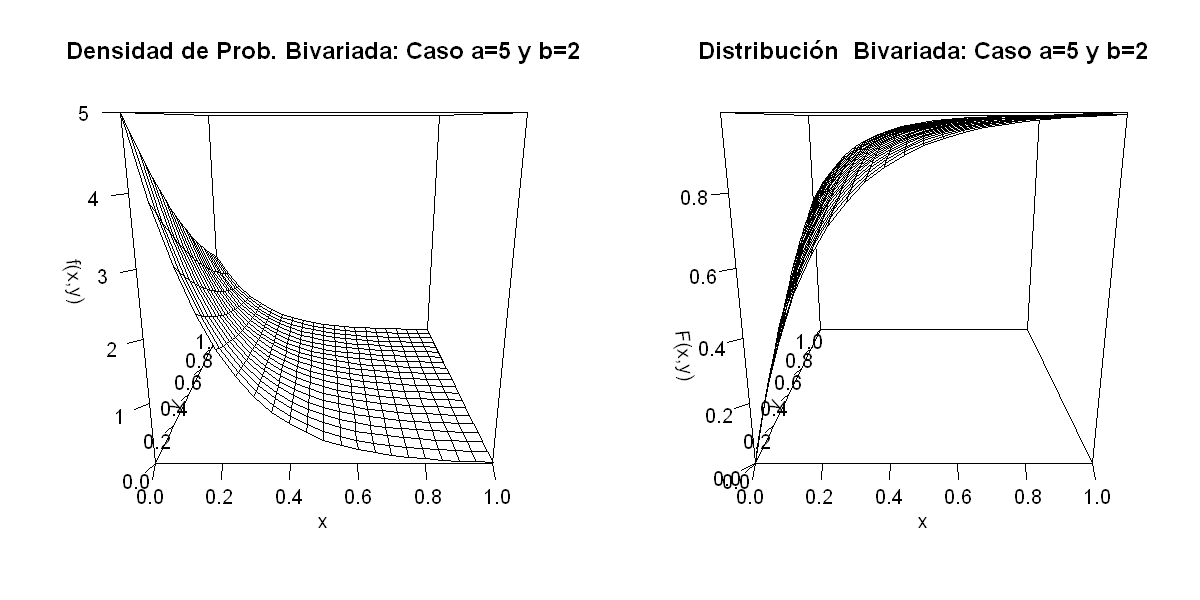

In [5]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
x <- seq(0,1,by=0.05)
y <- seq(0,1,by=0.05)
a=5
b=1
dens <- function(x,y) a*b*(exp (-a*x -b*y))
z = outer(x,y,dens)
persp(x,y,z,ticktype = "detailed",zlab="f(x,y)",main="Densidad de Prob. Bivariada: Caso a=5 y b=2")

dist <- function(x,y) 1-exp (-a*x -b*y) 
z = outer(x,y,dist)
persp(x,y,z,ticktype = "detailed",zlab="F(x,y)",main="Distribución  Bivariada: Caso a=5 y b=2")


## Regla de Bayes
En su formulación con variables aleatorias, la regla de Bayes queda:


$\begin{array}{lll}
P(y \mid x)& = & \frac{P(x \mid y) P_Y(y)}{P_X(x)} \,= \, \frac{P(x \mid y) P_Y(y)}{\sum_y P(x\mid y) P_y(y))}\\
\end{array}$

